In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv("Data Covid19.csv")
data.head()


Province/State  Country/Region      Last Update  Confirmed  Deaths  \
0          Anhui  Mainland China  1/22/2020 17:00          1       0   
1        Beijing  Mainland China  1/22/2020 17:00         14       0   
2      Chongqing  Mainland China  1/22/2020 17:00          6       0   
3         Fujian  Mainland China  1/22/2020 17:00          1       0   
4          Gansu  Mainland China  1/22/2020 17:00          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  173972 non-null  object
 1   Country/Region  236017 non-null  object
 2   Last Update     236017 non-null  object
 3   Confirmed       236017 non-null  int64 
 4   Deaths          236017 non-null  int64 
 5   Recovered       236017 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.8+ MB


In [9]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [10]:
latest_date = '28/02/2021 05.22'
data[data['Last Update']==latest_date]

Province/State  Country/Region       Last Update  Confirmed  \
235253                NaN     Afghanistan  28/02/2021 05.22      55707   
235254                NaN         Albania  28/02/2021 05.22     106215   
235255                NaN         Algeria  28/02/2021 05.22     112960   
235256                NaN         Andorra  28/02/2021 05.22      10849   
235257                NaN          Angola  28/02/2021 05.22      20782   
...                   ...             ...               ...        ...   
236012  Zaporizhia Oblast         Ukraine  28/02/2021 05.22      69504   
236013            Zeeland     Netherlands  28/02/2021 05.22      16480   
236014           Zhejiang  Mainland China  28/02/2021 05.22       1321   
236015    Zhytomyr Oblast         Ukraine  28/02/2021 05.22      50582   
236016       Zuid-Holland     Netherlands  28/02/2021 05.22     255335   

        Deaths  Recovered  
235253    2443      49288  
235254    1775      68969  
235255    2979      77976  
235256     110      10429  
235257     506      19315  
...        ...        ...  
236012    1132      65049  
236013     178          0  
236014       1       1314  
236015     834      44309  
236016    3732          0  

[764 rows x 6 columns]

In [11]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

In [12]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-12-1d4d890109d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())


In [13]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Belarus', 285959), ('Hungary', 424130), ('Costa Rica', 204341), ('Martinique', 0), ('Guernsey', 0), ('Sao Tome and Principe', 1786), ('Gambia', 4691), ('Tunisia', 232615), ('North Ireland', 0), ('Saint Lucia', 3356), ('Sri Lanka', 82890), ('Saudi Arabia', 377061), ('Uruguay', 57362), ('Uzbekistan', 79836), ('Greenland', 0), ('Saint Barthelemy', 0), ('Cape Verde', 0), ('Andorra', 10849), ('Central African Republic', 5004), ('Cyprus', 34424), ('Samoa', 3), ('Solomon Islands', 18), ('South Korea', 89676), ('The Gambia', 0), ('Yemen', 2269), ('Sierra Leone', 3887), ('Paraguay', 158537), ('Denmark', 211420), ('Gabon', 14564), ('Latvia', 85810), ('Cabo Verde', 15324), ('Bolivia', 248547), ('Gibraltar', 0), ('Iran', 1623159), ('Chad', 3973), ('Maldives', 19597), ('French Guiana', 0), ('Diamond Princess', 712), ('Palestine', 0), ('Papua New Guinea', 1275), ('Faroe Islands', 0), ('Spain', 3188553), ('Thailand', 25951), ('Peru', 1323863), ('Iceland', 6049), ('Oman', 140588), ('Bangladesh', 54

In [14]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Beijing', 'Chongqing', 'Guangdong', 'Guangxi', 'Hainan', 'Henan',
       'Hubei', 'Hunan', 'Jiangxi', 'Liaoning', 'Shandong', 'Shanghai',
       'Sichuan', 'Tianjin', 'Zhejiang', nan, 'Anhui', 'Fujian', 'Gansu',
       'Guizhou', 'Heilongjiang', 'Hong Kong', 'Jiangsu', 'Macau',
       'Shaanxi', 'Xinjiang', 'Yunnan', 'Jilin', 'Taiwan', 'Ningxia',
       'Hebei', 'Inner Mongolia', 'Shanxi', 'California', 'Qinghai',
       'New South Wales', 'Bavaria', 'Ontario', 'Victoria', 'Queensland',
       'Illinois', 'Chicago, IL', 'South Australia', 'San Benito, CA',
       'Santa Clara, CA', 'Toronto, ON', 'British Columbia',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)',
       'Lackland, TX (From Diamond Princess)',
       'Unassigned Location (From Diamond Princess)', 'None',
       '

In [15]:
provinces_confirmed_case = []
for i in unique_provinces:
  provinces_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-15-4349731a087e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  provinces_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())


In [16]:
print(set(zip(unique_provinces, provinces_confirmed_case)))

{('Nevada', 293488), ('Ashland, NE', 0), ('Lambayeque', 38054), ('Jharkhand', 119905), ('Bolivar', 66654), ('Krasnoyarsk Krai', 62411), ('Hillsborough, FL', 0), ('Orange County, CA', 0), ('South Carolina', 515072), ('Apurimac', 11280), ('Meghalaya', 13961), ('Bermuda', 705), ('Nayarit', 10839), ('Espirito Santo', 325190), ('Mie', 2520), ('Rivne Oblast', 48779), ('Puno', 23767), ('Mayotte', 16861), ('Suffolk County, MA', 0), ('Mecklenburg-Vorpommern', 24488), ('Atacama', 11937), ('Brussels', 95051), ('Saskatchewan', 28506), ('Douglas County, NE', 0), ('Tasmania', 234), ('Northwest Territories', 47), ('Anhui', 994), ('Bonaire, Sint Eustatius and Saba', 196), ('Emilia-Romagna', 258007), ('Choco', 6533), ('Vologda Oblast', 39097), ('Hainan', 171), ('Astrakhan Oblast', 28181), (nan, 0), ('Australian Capital Territory', 118), ('Sachsen', 194177), ('Guerrero', 35279), ('Utah', 370770), ('Altai Krai', 43399), ('Moscow', 976739), ('Tottori', 211), ('Travis, CA', 0), ('West Virginia', 131580), (

In [18]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [19]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(provinces_confirmed_case)

In [20]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Beijing',
 'Chongqing',
 'Guangdong',
 'Guangxi',
 'Hainan',
 'Henan',
 'Hubei',
 'Hunan',
 'Jiangxi',
 'Liaoning',
 'Shandong',
 'Shanghai',
 'Sichuan',
 'Tianjin',
 'Zhejiang',
 'Anhui',
 'Fujian',
 'Gansu',
 'Guizhou',
 'Heilongjiang',
 'Hong Kong',
 'Jiangsu',
 'Macau',
 'Shaanxi',
 'Xinjiang',
 'Yunnan',
 'Jilin',
 'Taiwan',
 'Ningxia',
 'Hebei',
 'Inner Mongolia',
 'Shanxi',
 'California',
 'Qinghai',
 'New South Wales',
 'Bavaria',
 'Ontario',
 'Victoria',
 'Queensland',
 'Illinois',
 'Chicago, IL',
 'South Australia',
 'San Benito, CA',
 'Santa Clara, CA',
 'Toronto, ON',
 'British Columbia',
 'Cruise Ship',
 'Diamond Princess cruise ship',
 'San Diego County, CA',
 'Ashland, NE',
 'Travis, CA',
 'From Diamond Princess',
 'Lackland, TX',
 'Omaha, NE (From Diamond Princess)',
 'Travis, CA (From Diamond Princess)',
 'Lackland, TX (From Diamond Princess)',
 'Unassigned Location (From Diamond Princess)',
 'None',
 'Sacramento County, CA',
 'Seattle, WA',
 'Western Australia',
 'S

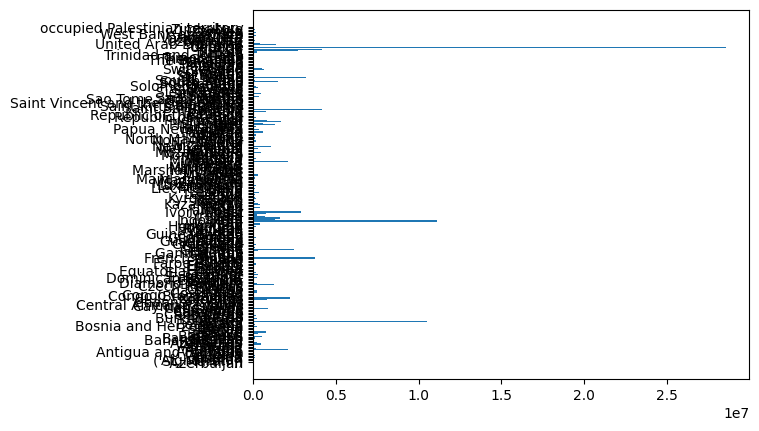

In [21]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

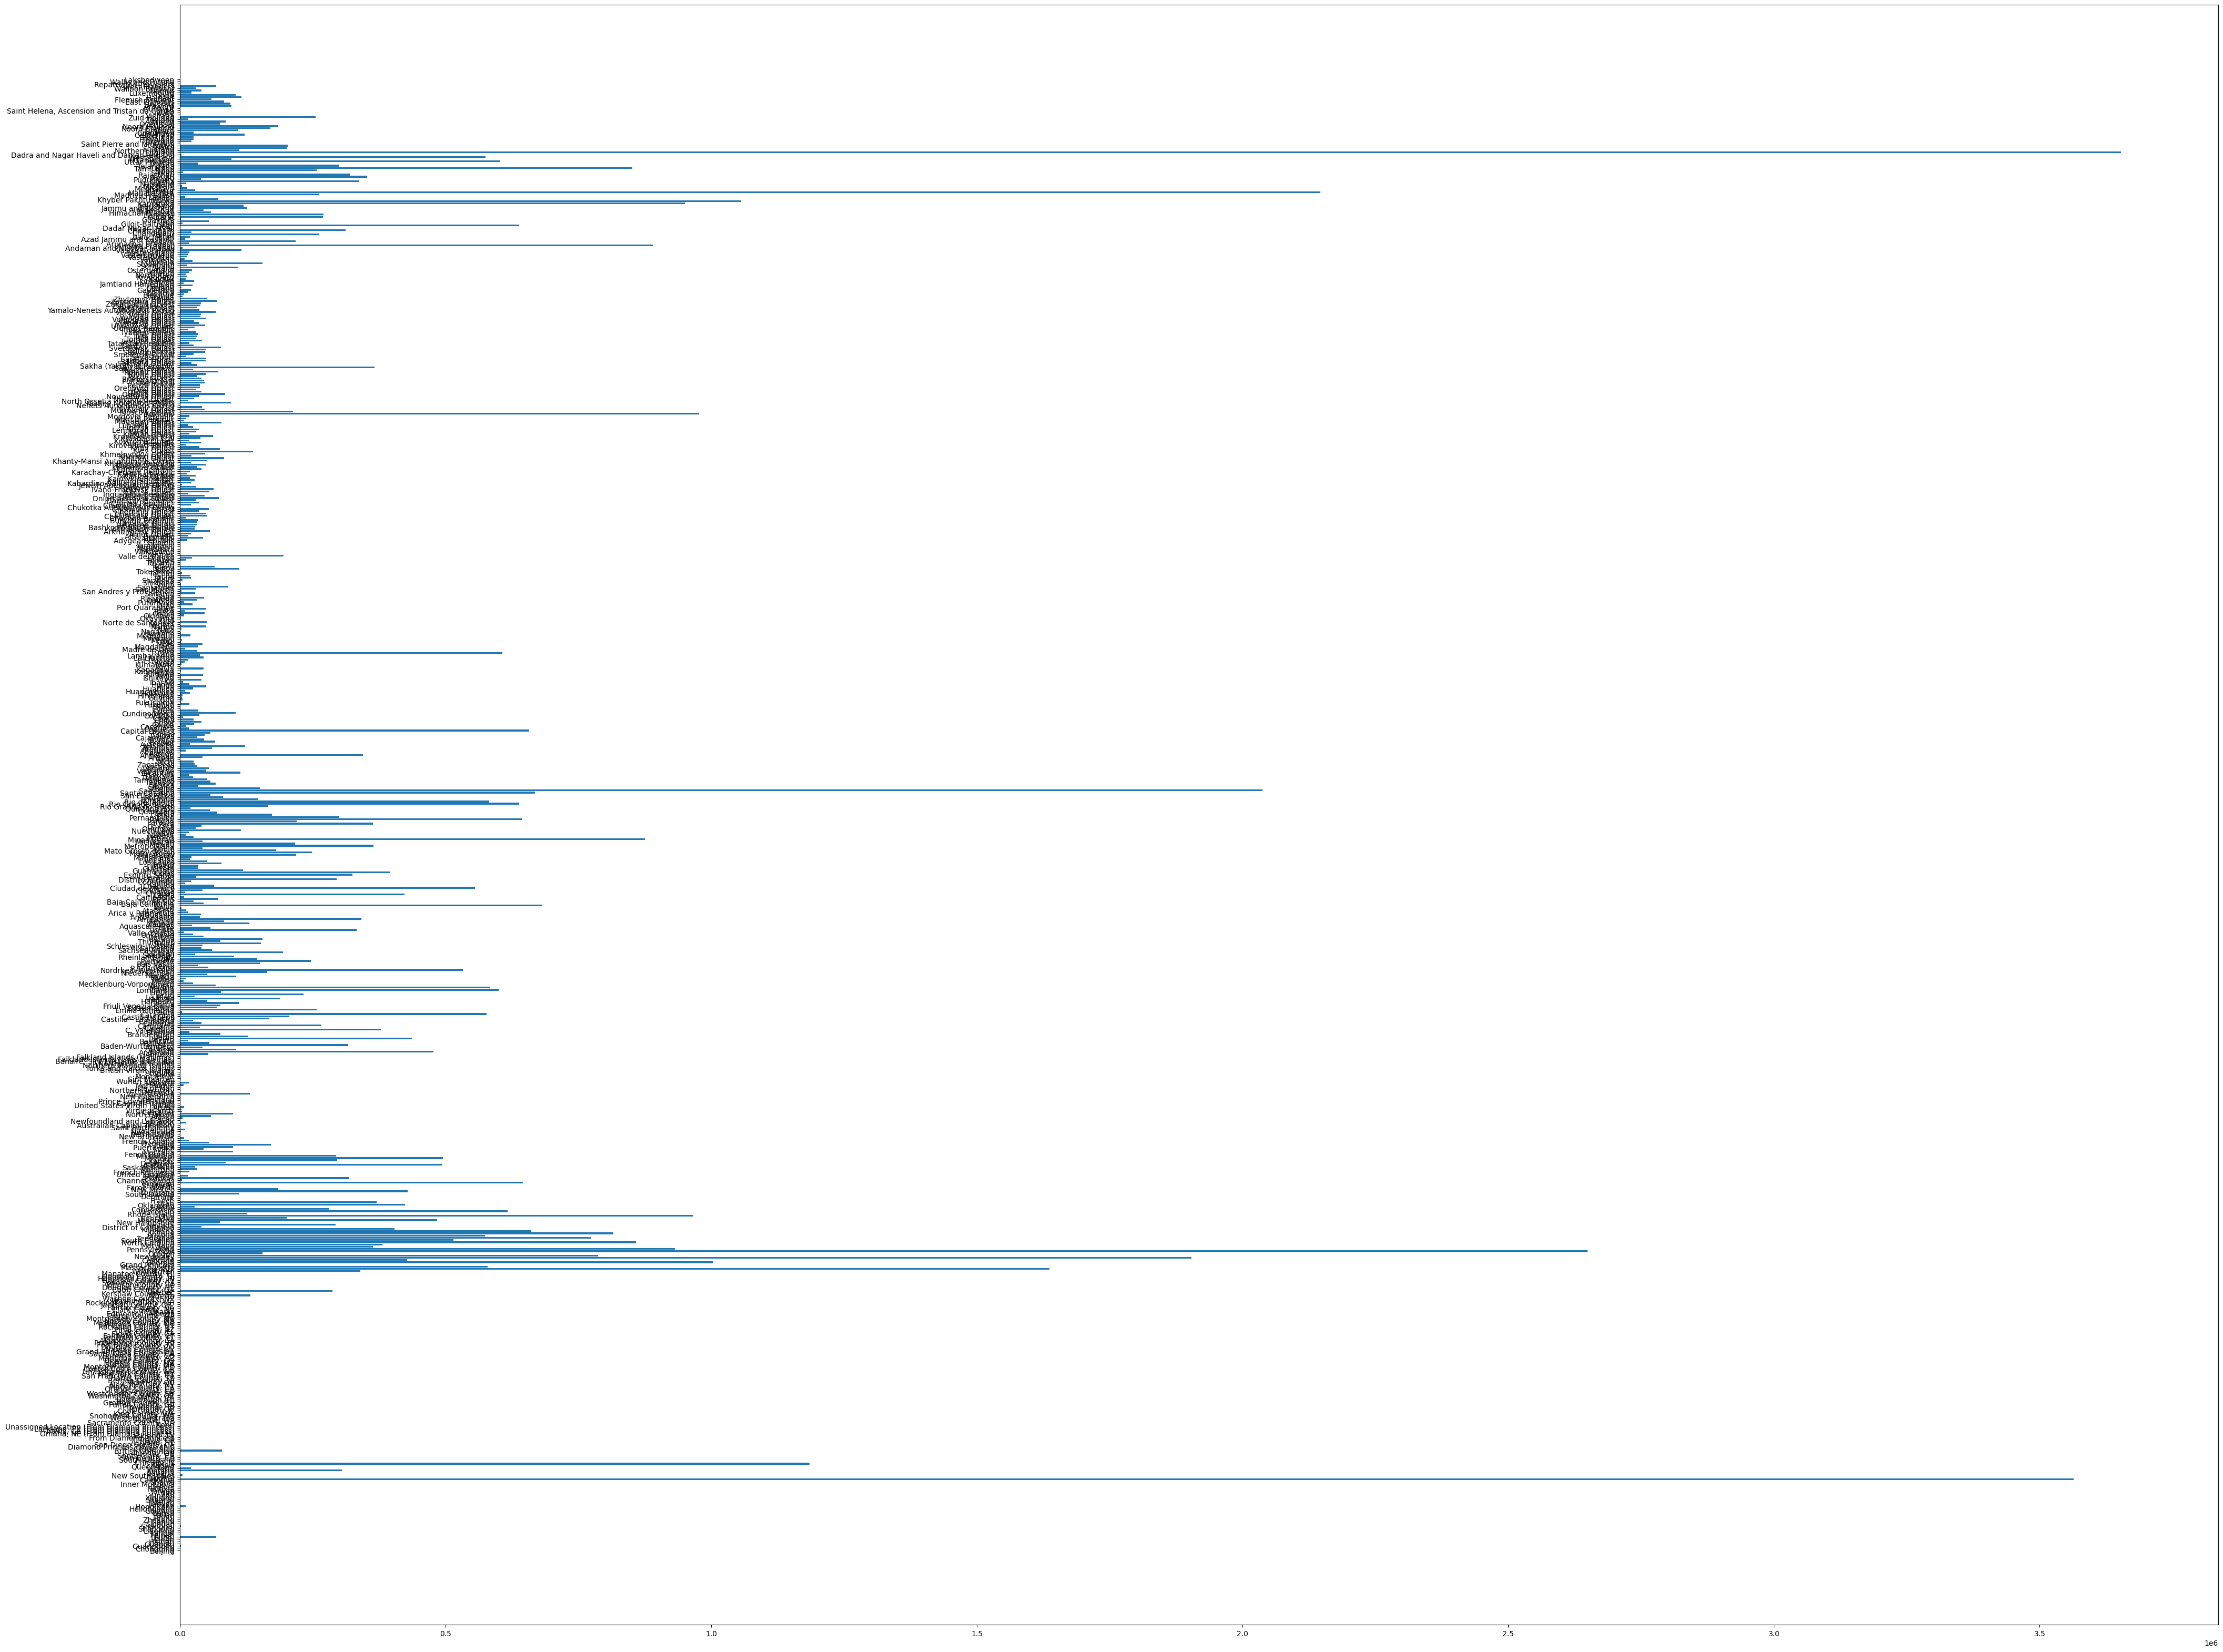

In [22]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

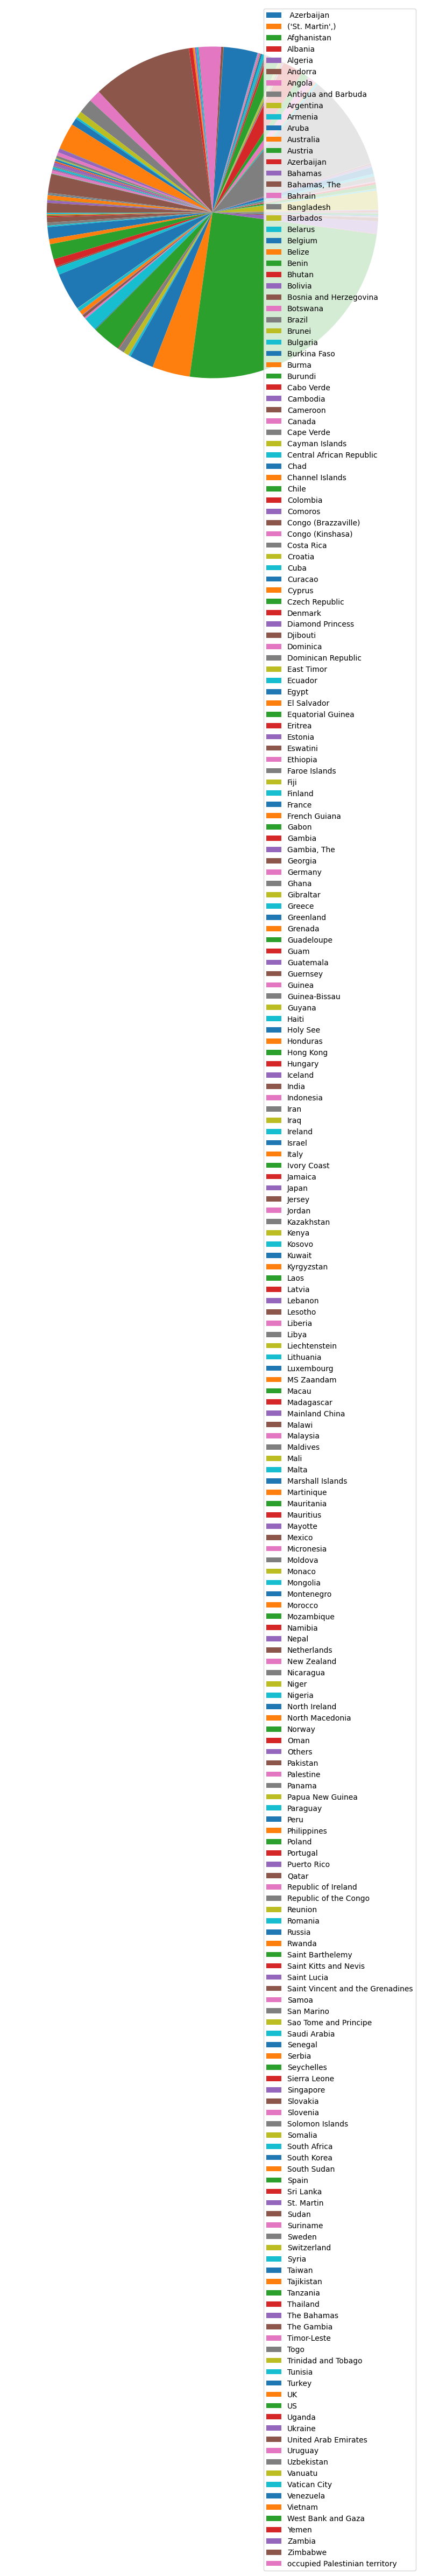

In [23]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

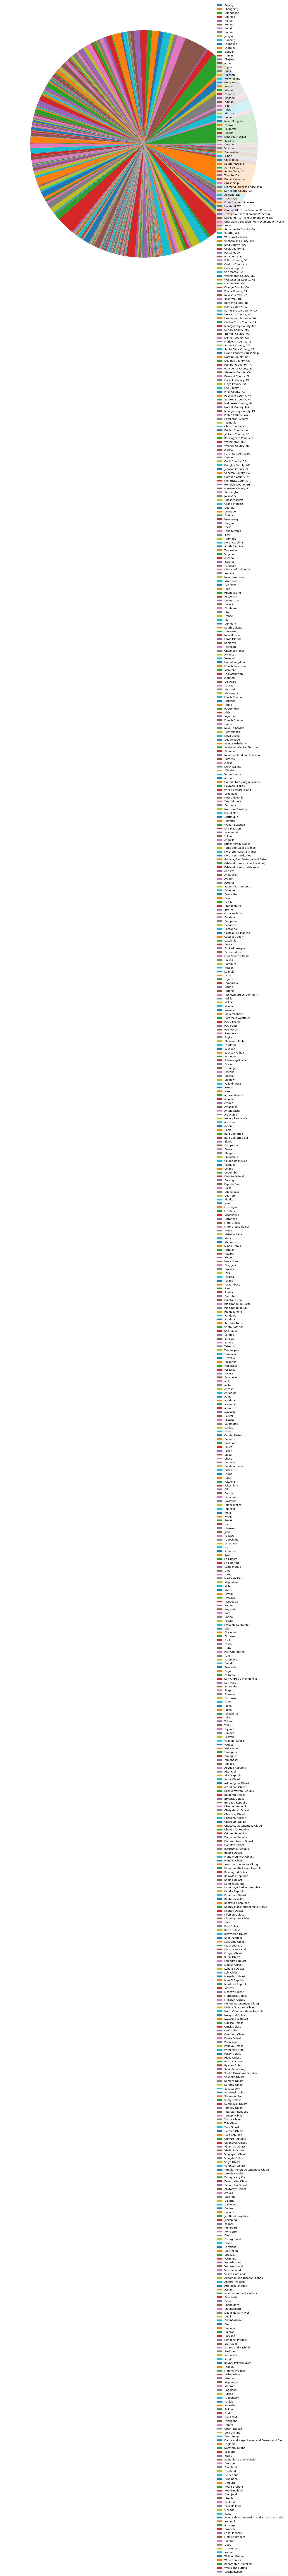

In [24]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()
